# Design of Experiments

Design of experiments (DoE) is a systematic approach to planning, conducting, analysing, and interpreting controlled experiments {cite}`montgomery2017design`. It aims to ensure that the results are valid, reliable, and can be used to draw causal conclusions. DoE is essential in various fields, including engineering, medicine, agriculture, and computer science.

The **key concepts** of DoE include:
- **Randomisation**: Randomly assigning subjects to different treatment groups to eliminate bias.
- **Replication**: Repeating the experiment to estimate variability and ensure reliability.
- **Blocking**: Grouping similar experimental units and randomising within these blocks to reduce variability.

A good mantra for dealing with the presence of confounders is **block what you can, randomise what you cannot**. What do we mean by this? In experimental design, controlling for confounders is crucial to ensure that the results are valid and reliable. Confounders are variables that can affect both the independent variable and the dependent variable, potentially leading to biased or incorrect conclusions about the relationship between these variables. The mantra "block what you can, randomise what you cannot" provides a practical approach to managing confounding variables.
1. **Block what you can**: blocking is a technique used to control for known sources of variability that are not of primary interest but could influence the outcome of the experiment. By grouping similar experimental units into blocks, we can account for these sources of variability and reduce their impact on the results. For example, in an experiment to test the efficiency of different battery storage systems, we might block by the type of battery used. Each block would contain all types of batteries, ensuring that the variation due to the battery type is controlled for and does not confound the results. Blocking helps isolate the effect of the primary factors being studied by accounting for the variability due to other known factors.

2. **Randomise what you cannot**: randomisation is used to control for unknown or uncontrollable sources of variability. By randomly assigning experimental units to different treatment groups, we ensure that these sources of variability are evenly distributed across all groups, reducing the risk of bias. For example, if we are conducting an experiment to test different charging rates and temperatures on battery efficiency, and we cannot control the environmental conditions precisely, we can randomly assign the charging rates and temperatures to different batteries. This way, any unknown or uncontrollable factors (like slight variations in ambient temperature) are equally likely to affect all treatment groups, minimising their impact on the results. Randomisation helps ensure that the treatment groups are comparable and that the observed effects are due to the treatments themselves rather than other extraneous factors.


## Some Relevant Designs

In most cases, DoE is used to analyse the relationship between the input and output factors of a process. Various tests are performed to see the effect of varying levels of input factors on the response. For example, in the context of electricity markets, we might be interested in designing an experiment to understand the effect of charge rate and temperature on the efficiency of a battery storage system. By systematically varying these factors, researchers can identify optimal operating conditions and interactions between variables. The critical aspect of DoE is the way the factor levels are varied throughout the experiment.

### Factorial Designs
One of the most common types of design is the factorial design, where in each complete trial or replicate of the experiment all possible combinations of the levels of the factors are investigated. A **$2^K$ factorial design** is a special case of factorial design where each of the $K$ factors is studied at two levels, often referred to as low (-1) and high (1). This design is highly efficient for exploring the main effects and interactions among factors. In the context of a battery storage system, suppose we are interested in the effects of two factors: charge rate and temperature. Each factor can be set at two levels: low (-1) and high (1). This is the data that would be collected using a $2^2$ factorial design, without replications:

| Run | Charge Rate (C) | Temperature (°C) | Efficiency (%) |
|-----|-----------------|------------------|----------------|
| 1   | -1              | -1               | 85             |
| 2   | -1              | 1                | 80             |
| 3   | 1               | -1               | 90             |
| 4   | 1               | 1                | 75             |

The figure below shows a factorial experiment where both charge rate and temperature can be set at two levels. The black dots represent the points where the tests are performed, namely where the response is measured. 

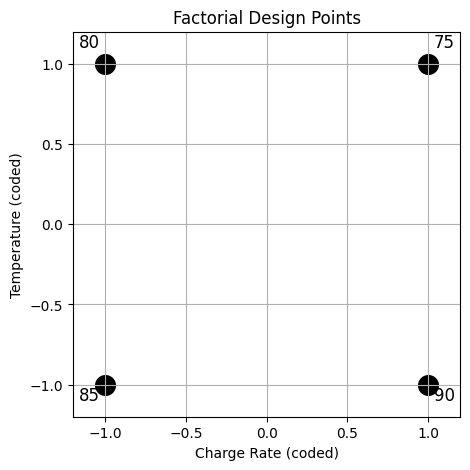

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data for factorial design
data = pd.DataFrame({
    'Charge_Rate': [-1, -1, 1, 1],
    'Temperature': [-1, 1, -1, 1],
    'Efficiency': [85, 80, 90, 75]
})

# Generate grid for plotting
x1 = np.array([-1, 1])
x2 = np.array([-1, 1])
X1, X2 = np.meshgrid(x1, x2)

# Plotting the factorial design points
plt.figure(figsize=(5, 5))
plt.scatter(data['Charge_Rate'], data['Temperature'], color='black', s=200)
plt.xlabel('Charge Rate (coded)')
plt.ylabel('Temperature (coded)')
plt.title('Factorial Design Points')
plt.grid(True)

# Annotating the points with their efficiency values
for i, txt in enumerate(data['Efficiency']):
    plt.annotate(txt, (data['Charge_Rate'][i]*1.1, data['Temperature'][i]*1.1), fontsize=12, color='k', ha='center')
plt.ylim(-1.2, 1.2)
plt.xlim(-1.2, 1.2)
plt.show()


The effect of a factor is defined as the change in response produced by a change in the level of the factor. Assuming linearity in the factor effects within the design space, an ordinary least squares (OLS) regression model is usually fit on the experimental data.

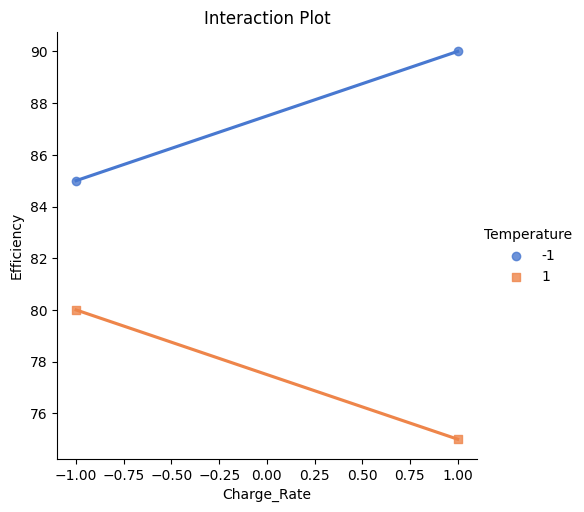

In [42]:
from statsmodels.formula.api import ols
import seaborn as sns

# Fit the model
model = ols('Efficiency ~ Charge_Rate * Temperature', data=data).fit()
# print(model.summary())

# Plotting the interaction
sns.lmplot(x='Charge_Rate', y='Efficiency', hue='Temperature', data=data, markers=['o', 's'], ci=None, palette='muted', height=5, aspect=1)
plt.title('Interaction Plot')
plt.show()

The interaction plot visualises the relationship between the charge rate and the efficiency of the battery storage system, with temperature as the moderating variable. Each line in the plot represents the effect of charge rate on efficiency at a specific temperature level, indicated by different colors and markers. The x-axis shows the coded values for charge rate (with -1 representing a low charge rate and 1 representing a high charge rate), while the y-axis displays the battery efficiency in percentage.

From this plot, readers can observe how the efficiency changes with varying charge rates and how this relationship is influenced by temperature.
- If the lines for different temperatures are **parallel**, it indicates that there is no interaction between charge rate and temperature—each factor independently affects efficiency.
- If the lines are **not parallel**, this suggests an interaction effect, meaning the impact of charge rate on efficiency depends on the temperature level. For instance, one might notice that increasing the charge rate significantly boosts efficiency at a lower temperature but not at a higher temperature. This insight is crucial for optimising the battery storage system, as it highlights the importance of considering both factors together rather than in isolation.

Overall, the interaction plot provides a clear and intuitive way to understand complex relationships between multiple factors, helping researchers and practitioners to make informed decisions about optimising the system's performance.

### Central Composite Designs

The central composite design (CCD) is an extension of factorial design used for building a second-order (quadratic) model without needing to perform a complete three-level factorial experiment. It includes:
- **Factorial points**: these are points from a standard $2^k$ factorial design, where $k$ is the number of factors. The factorial points allow for the estimation of the main effects and interaction effects.
- **Centre points**: these are the midpoints of all factor levels and are replicated to provide an estimate of the experimental error. Centre points help detect curvature in the response surface.
- **Axial points**: these points are added at a distance $\alpha$ from the centre along each axis of the factor space. Axial points enable the estimation of the quadratic terms, providing the necessary information to fit a second-order model.

The CCD is highly efficient for exploring the quadratic response surface and identifying the optimal settings of the input factors. By combining these points, CCDs provide a balanced and comprehensive design for understanding the effects of factors and their interactions. Here you can see an example of how to obtain a CCD by adding centre points and axial points to a regular $2^k$ factorial design.

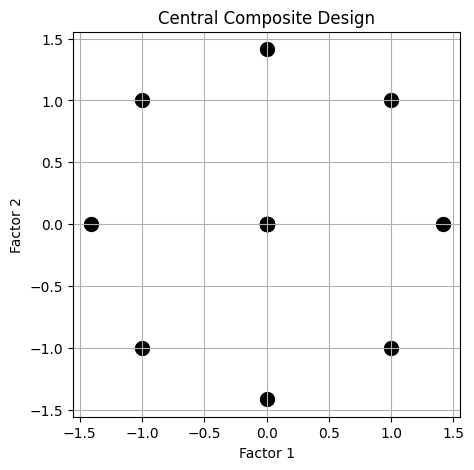

In [45]:
from pyDOE2 import ccdesign

# Create a CCD design
ccd = ccdesign(2, center=(4, 4))

# Plot the CCD design
plt.figure(figsize=(5, 5))
plt.scatter(ccd[:, 0], ccd[:, 1], c='k', linewidths=5)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Central Composite Design')
plt.grid(True)
plt.show()

Let's now consider an example where we want to use a CCD to build a model for optimising the output of a solar power plant based on two controllable variables: cleaning frequency ($x_1$) and tilt angle ($x_2$). Using a CCD and measuring the value of the response ($y$) at the design locations, we would collect this dataset:

| Run | Cleaning Frequency (times/month) | Tilt Angle (degrees) | Output (kWh) |
|-----|----------------------------------|----------------------|--------------|
| 1   | -1                               | -1                   | 500          |
| 2   | -1                               | 1                    | 520          |
| 3   | 1                                | -1                   | 540          |
| 4   | 1                                | 1                    | 560          |
| 5   | 0                                | 0                    | 550          |
| 6   | 0                                | 0                    | 570          |
| 7   | -1.414                           | 0                    | 530          |
| 8   | 1.414                            | 0                    | 580          |
| 9   | 0                                | -1.414               | 540          |
| 10  | 0                                | 1.414                | 580          |

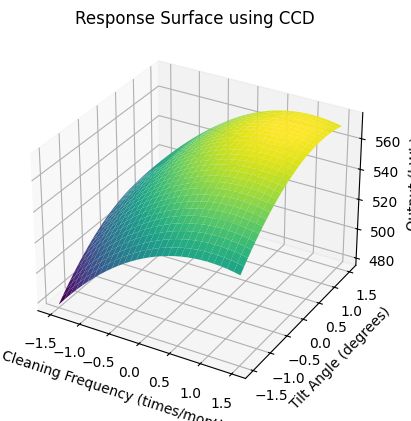

In [48]:
from statsmodels.tools import add_constant
from mpl_toolkits.mplot3d import Axes3D

# Data for CCD
data = pd.DataFrame({
    'Cleaning_Frequency': [-1, -1, 1, 1, 0, 0, -1.414, 1.414, 0, 0],
    'Tilt_Angle': [-1, 1, -1, 1, 0, 0, 0, 0, -1.414, 1.414],
    'Output': [500, 520, 540, 560, 550, 570, 530, 580, 540, 580]
})

# Define the design matrix for the quadratic model
X = np.column_stack((data['Cleaning_Frequency'], data['Tilt_Angle'],
                     data['Cleaning_Frequency']**2, data['Tilt_Angle']**2,
                     data['Cleaning_Frequency']*data['Tilt_Angle']))

# Add constant (intercept)
X = add_constant(X)

# Fit the model
model = OLS(data['Output'], X).fit()

# Prepare data for 3D surface plot
x1 = np.linspace(-1.5, 1.5, 30)
x2 = np.linspace(-1.5, 1.5, 30)
X1, X2 = np.meshgrid(x1, x2)
X1_flat = X1.flatten()
X2_flat = X2.flatten()

# Create design matrix for predictions
X_pred = np.column_stack((np.ones_like(X1_flat), X1_flat, X2_flat,
                          X1_flat**2, X2_flat**2, X1_flat*X2_flat))

# Predict the response
Y_pred = model.predict(X_pred).reshape(X1.shape)

# Plot the response surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y_pred, cmap='viridis', edgecolor='none')
ax.set_xlabel('Cleaning Frequency (times/month)')
ax.set_ylabel('Tilt Angle (degrees)')
ax.set_zlabel('Output (kWh)')
plt.title('Response Surface using CCD')
plt.show()

We can see:
- **Quadratic effects**: the CCD allows for the estimation of both linear and quadratic effects, providing a more accurate representation of the response surface.
- **Optimisation**: by examining the response surface plot, we can identify the optimal settings for cleaning frequency and tilt angle to maximise the solar power plant's output.
- **Balanced design**: the inclusion of centre and axial points ensures that the design is balanced and provides sufficient information to detect curvature in the response surface.

This is a simple example of response surface methodology (RSM) {cite}`myers2016response`, which is a collection of statistical and mathematical techniques useful for developing, improving, and optimizing processes . It uses quantitative data from appropriate experiments to determine regression models and identify the optimal conditions. The goal is to optimize this response by finding the best settings of the input variables. 

### Designs for Computer Experiments

#### Space-Filling Designs

Space-filling designs aim to cover the experimental space uniformly. This is particularly important for **computer experiments** {cite}`santner2003design` where the objective is to explore the entire input space efficiently. Unlike physical experiments where replication helps estimate variability and improve reliability, computer experiments often use deterministic simulators, making replication less useful. Instead, the focus is on spreading out the points as much as possible to gain comprehensive insights across the entire input space.

#### Sobol Sequences
One example of designs for computer experiments are Sobol sequences. Sobol sequences are a type of low-discrepancy sequence used to generate space-filling designs. They provide a quasi-random sequence that covers the input space uniformly. Sobol sequences are particularly useful in high-dimensional spaces and are known for their good uniformity properties, making them ideal for numerical integration and simulation tasks.

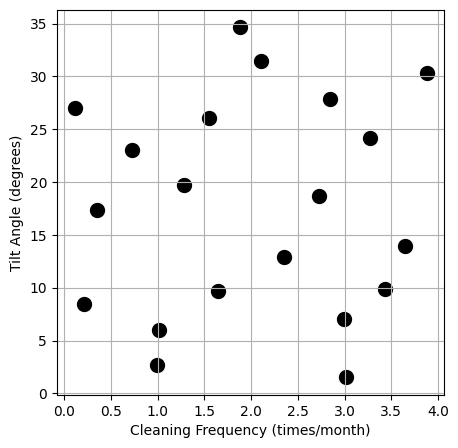

In [52]:
from scipy.stats import qmc

# Define the number of points and dimensions (2 in this case: Cleaning Frequency and Tilt Angle)
n_points = 20
dimensions = 2

# Generate Sobol sequence
sobol = qmc.Sobol(d=dimensions, scramble=True)
points = sobol.random(n=n_points)

# Scale points to the desired range (e.g., Cleaning Frequency: 0-4 times/month, Tilt Angle: 0-35 degrees)
cleaning_frequency = points[:, 0] * 4  # Scale to 0-4
tilt_angle = points[:, 1] * 35         # Scale to 0-35

# Plot the space-filling design
plt.figure(figsize=(5, 5))
plt.scatter(cleaning_frequency, tilt_angle, c='k', linewidths=5)
plt.xlabel('Cleaning Frequency (times/month)')
plt.ylabel('Tilt Angle (degrees)')
plt.grid(True)
plt.show()

#### Latin Hypercubes
Latin Hypercube Sampling (LHS) is another method used to create space-filling designs. It divides the range of each input variable into equal intervals and ensures that each interval is sampled exactly once. This approach ensures a more uniform coverage of the input space compared to simple random sampling. LHS is particularly effective in reducing variance and ensuring that the sample points are well-distributed across the entire range of each input variable.

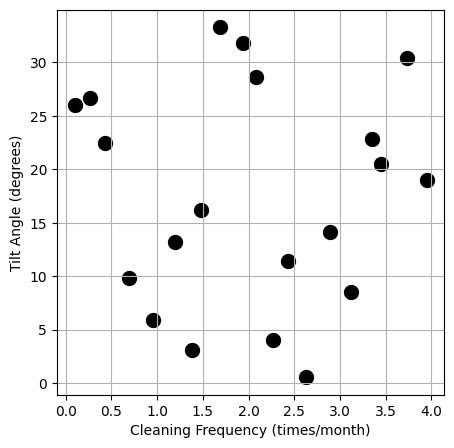

In [53]:
from scipy.stats import qmc

# Define the number of points and dimensions (2 in this case: Cleaning Frequency and Tilt Angle)
n_points = 20
dimensions = 2

# Generate Latin Hypercube Sampling points
lhs = qmc.LatinHypercube(d=dimensions)
points = lhs.random(n=n_points)

# Scale points to the desired range (e.g., Cleaning Frequency: 0-4 times/month, Tilt Angle: 0-35 degrees)
cleaning_frequency = points[:, 0] * 4  # Scale to 0-4
tilt_angle = points[:, 1] * 35         # Scale to 0-35

# Plot the space-filling design
plt.figure(figsize=(5, 5))
plt.scatter(cleaning_frequency, tilt_angle, c='k', linewidths=5)
plt.xlabel('Cleaning Frequency (times/month)')
plt.ylabel('Tilt Angle (degrees)')
plt.grid(True)
plt.show()

Space-filling designs are essential for computer experiments where the goal is to explore the entire input space efficiently. By ensuring uniform coverage, these designs provide comprehensive insights into the system's behaviour, improving the accuracy and robustness of predictive models. Both Sobol sequences and Latin Hypercube Sampling are effective methods for generating space-filling designs, each with its unique advantages in providing uniform and well-distributed sample points across the input space.

## Design Optimality Criteria

Design optimality involves selecting an experimental design that provides the most information about the parameters of interest with the least experimental effort. Optimal designs are tailored to achieve specific statistical goals, ensuring that experiments are both efficient and informative. Here are some common criteria used to achieve design optimality:

- **D-optimality**: This criterion maximizes the determinant of the information matrix. A D-optimal design provides the most precise parameter estimates by ensuring that the volume of the confidence ellipsoid for the estimated parameters is minimized. In essence, it spreads the experimental points in such a way that they collectively capture as much information as possible about the parameters.
  
- **A-optimality**: This criterion minimizes the trace of the inverse information matrix. By focusing on reducing the average variance of the parameter estimates, A-optimal designs aim to make the overall estimation process more efficient. This means that the parameters can be estimated with lower average uncertainty.

- **G-optimality**: This criterion minimizes the maximum prediction variance within the design space. G-optimal designs are concerned with ensuring that the model's predictions are as accurate as possible across the entire experimental region. This approach is particularly useful when the goal is to have a model that performs well uniformly across the design space.